<a href="https://colab.research.google.com/github/binaria010/Mate2B/blob/main/Clase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Splines Cúbicos**

**Recuerdo:** $$$$
Interpolamos en cada intervalo $[x_i, x_{i+1}]$ por un polinomio $p_i$ de
grado 3. De forma tal que


*   $p_i(x_i) = y_i$, $p_i(x_{i+1}) = y_{i+1}$, para $i = 0,..., n − 1$;
*   $p'_i(x_{i+1}) = p'_{i+1}(x_{i+1})$, para $i = 0,..., n − 2$;
*   $p''_i(x_{i+1}) = p''_{i+1}(x_{i+1})$, para $i = 0,..., n − 2$;

Cada $p_i$ tiene 4 coeficientes. Hay que hallar, entonces, $4n$ coeficientes. Sin embargo, hasta acá planteamos solo $2n + (n − 1) + (n − 1) = 4n − 2$ restricciones.


<br> 

El spline cúbico queda entonces:
$$
s_3(x) = \begin{cases}
p_0(x), &\quad \text{si } x\in [x_0, x_1]\\
p_1(x), &\quad \text{si } x\in [x_1, x_2]\\
\vdots  & \\
p_{n-1}(x), &\quad \text{si } x\in [x_{n-1}, x_{n}]\\
\end{cases}
$$


podemos poner dos condiciones mas (y asi tener $4n$ condiciones para $4n$ coeficientes:

* Naturales: $$s_3''(x_0)=0$$
$$s_3''(x_n)=0$$

* Periódica o clamped: Si $f(x_0)=f(x_n)$ ponemos como condiciones que: 
$$
s_3'(x_0) =s_3'(x_n)
$$
$$s_3''(x_0) = s_3''(x_n)$$ 




## Ejemplo:

Consideremos la función $f(x)=\frac{1}{1+x^2}$ en $[-1,1]$.

a) Hallar el polinomio interpolador en $n$ nodos de Chebyshev

b) Hallar el Spline cubico en $n$ puntos equiespaciados.

c) Graficar la función y los polinomios interpoladores:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate


In [17]:
# definimos f:

func = lambda x: 1/(1+x**2)




Para $n=3$ el spline cubico que hallamos es:

$$
s_3(x) = \begin{cases}
\frac{1}{2} +\frac{3}{4}(x+1) -\frac{1}{4}(x+1)^3, &\quad \text{si } x\in [-1, 0]\\
1 - \frac{3}{4}x^2 +\frac{1}{4}x^3, &\quad \text{si } x\in [0,1]\end{cases}
$$



In [14]:
n = 3

# definamos el spline que calculamos a mano para 3 nodos equiespaciados:

p = np.poly1d([1,1])
q = np.poly1d([1,0])
print(p, q)

p_1 = 1/2 + 3/4*p - 1/4 * p*p*p

p_2 = 1 - 3/4*q*q +1/4* q**3

print(p_1)
print(p_2)

 
1 x + 1  
1 x
       3        2
-0.25 x - 0.75 x + 1
      3        2
0.25 x - 0.75 x + 1


In [25]:
#el spline cubico es:

def S(x):

  if x >= -1 and x <= 0:
    return p_1(x)

  if x>= 0 and x<= 1:
    return p_2(x)

  else: print("error, x must be in [-1,1]")



Ahora para hallar el interpolador en nodos de Chebyshev usamos la funcion que armamos la vez pasada:

In [21]:
def Chebyshev(n):
    if n == 0:
        return(np.poly1d([1]))
    if n == 1:
        return(np.poly1d([1,0]))
    else:
        px = np.poly1d([1,0])
        return(2 * px * Chebyshev(n-1) - Chebyshev(n-2))
        

def P_cheby(n, a,b, f):

  """
  Esta funcion nos devuelve el polinomio interpolador de grado <= n-1 en los n
  nodos de Chebyshev (raices de T_n) en el intervalo [a, b] para la funcion f

  inputs
  -------
  n: type int. Grado del Chebyshev
  a, b: type floats. Limites del intervalo. 
  f: type function. Funcion que queremos interpolar


  output
  ---------

  p = numpy.poly12 objeto polinomio de numpy
  """

  # transformacion: 
  h = lambda t: (b-a)/2 *t +(a+b)/2

  raices = Chebyshev(n).r
  xi =  h(raices)
  yi = f(xi)

  p = interpolate.lagrange(xi, yi)

  return p


In [22]:
Pcheby = P_cheby(n, a=-1, b=1, f = func)
print(Pcheby)

         2
-0.5714 x + 1.11e-16 x + 1


ploteamos:

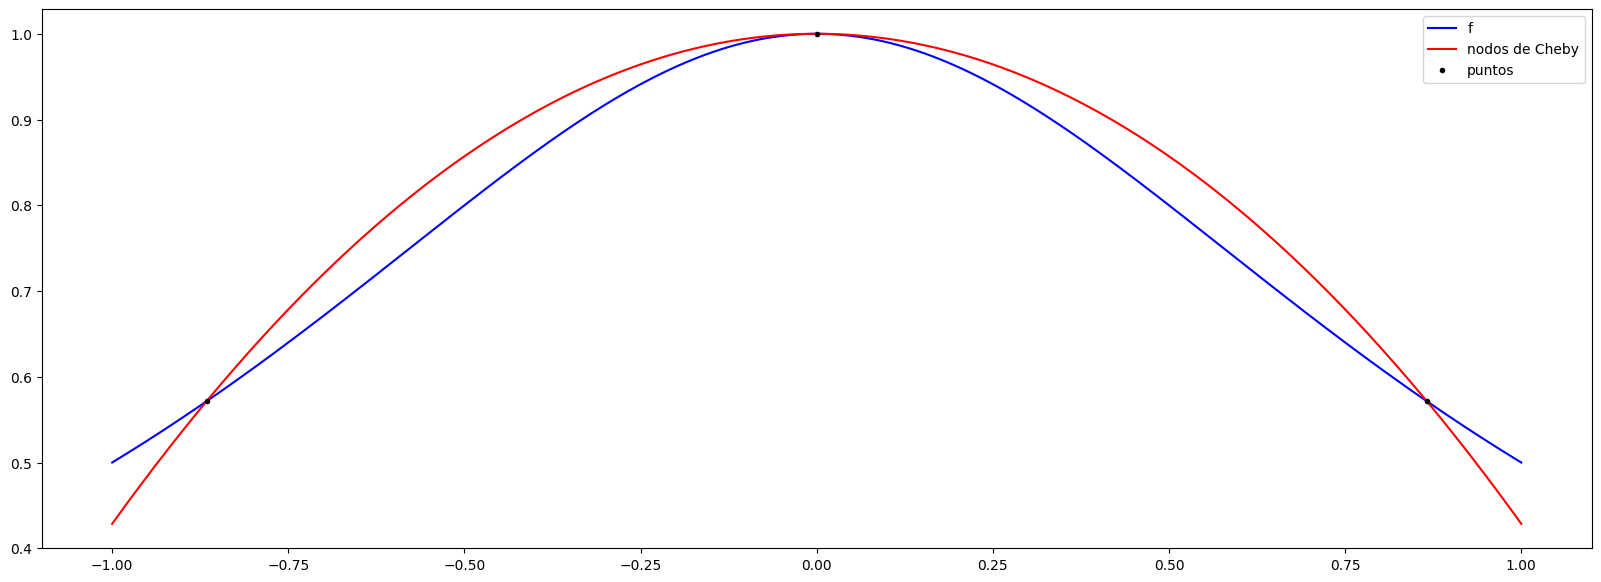

In [24]:
grilla_x = np.linspace(-1,1, 1000)
nodos = Chebyshev(n).r
y = func(nodos)


plt.figure(figsize = (20, 7))
plt.plot(grilla_x, func(grilla_x), label = "f", color = "b")
plt.plot(grilla_x, Pcheby(grilla_x), label = "nodos de Cheby", color = "red")
plt.plot(nodos, y, '.', label ="puntos", color = "black")
plt.legend()
plt.show()


Ahora el plot de f y el spline cubico:

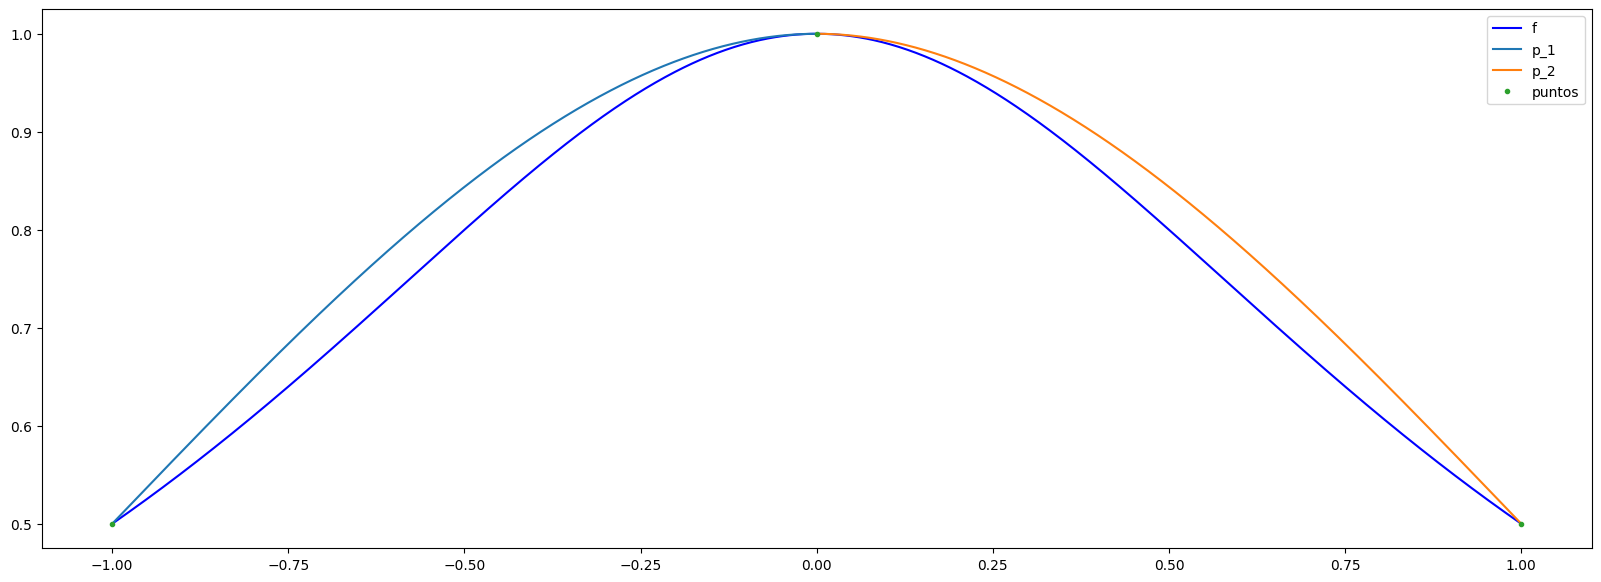

In [30]:
xi = np.linspace(-1,1,3)
yi = func(xi)

grilla1= np.linspace(-1, 0, 1000)
grilla2 = np.linspace(0,1, 1000)

plt.figure(figsize = (20, 7))
plt.plot(grilla_x, func(grilla_x), label = "f", color = "b")
plt.plot(grilla1, p_1(grilla1),  label = "p_1" )
plt.plot(grilla2, p_2(grilla2),  label = "p_2" )
plt.plot(xi, yi , '.', label = "puntos")
plt.legend()
plt.show()

Ahora hagamoslo para n mas grande, para esto usamos la funcion de scipy.interpolate CubicSpline

array(1.)

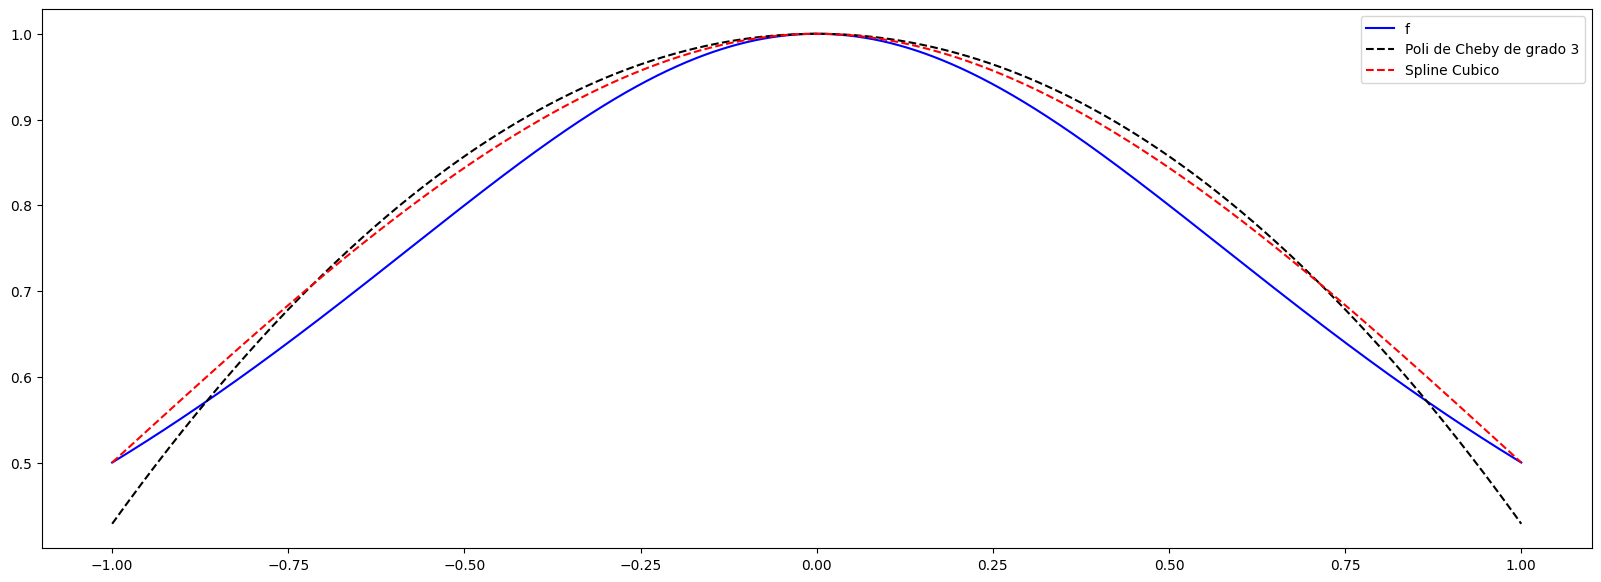

In [46]:
n = 3

# los x's:
nodosequi = np.linspace(-1,1,n)
nodosCheby = Chebyshev(n).r   #pueden usar la formula de las raices del Chebyshev cos((2k+1)pi/(2n))

# los y's:
yequi = func(nodosequi)
ycheby = func(nodosCheby)

# spline cubico con CubicSpline:

S = interpolate.CubicSpline(nodosequi, yequi, bc_type = 'natural') 


Pcheby_n = P_cheby(n, a = -1, b=1, f = func)




grilla_x = np.linspace(-1,1, 1000)
nodos = Chebyshev(n).r
y = func(nodos)


plt.figure(figsize = (20, 7))
plt.plot(grilla_x, func(grilla_x), label = "f", color = "b")
plt.plot(grilla_x, Pcheby_n(grilla_x) , linestyle = 'dashed', label = "Poli de Cheby de grado " +str(n), color = "black")
plt.plot(grilla_x, S(grilla_x), linestyle = 'dashed', label = "Spline Cubico", color = "red")
#plt.plot(nodos, y, '.', label ="puntos", color = "black")
plt.legend()
plt.show()

## Tarea Para resolver en clase


sea $f(x)=\exp((\cos(\pi x)+1)^2)$ con $x\in[0,8]$

a) Hallar el pol interpolador en $n$ nodos de Chebyshev (n =3, 5,7)
b) Hallar el Spline cubico en $n$ nodos esquiespaciados (mismo n que item a))
c) Graficar f y ambos polinomios (un grafico para cada n que considere)

In [ ]:
#Definir una función que haga de f(x)

def f(x):
  
  return # completar

print(f(0))

In [ ]:
#Graficar la función en el intervalo pedido


grilla_x =np.linspace( #completar )

plt.plot(grilla_x, f(grilla_x))
plt.show()

In [ ]:
# Definir el spline cubico usando interpolate.CubicSpline  usar bc_type = 'clamped'

n = #cantidad de puntos equiespaciados
nodos_equi = np.linspace( )
y_equi = f(nodos_equi)


S = # completar

Para generar los nodos de Chebyshev se puede usar la formula en $[0,8]$ 

$$x_j = \frac{8-0}{2}\cos\left(\frac{(2j+1)\pi}{2n}\right)+\frac{8+0}{2}=4\cos\left(\frac{(2j+1)\pi}{2n}\right)+4.$$

In [ ]:
# Definir el polinomio interpolador en nodos de Chebyshev:

nodos_cheby = #completar

y_cheby = f(nodos_cheby)

P_cheby =  interpolate.lagrange( #completar )

## **Condiciones de borde**


*   `not-a-knot` (default). Solo sirve para cuando hay 3 o más intervalos.
*   `periodic:` Si se asume que la función original es periódica, de período $x_n − x_0$. Entonces $y_0 = y_n$ y vale que $p'_0(x_0) = p'_{n−1}(x_n)$ y $p''_
0(x_0) = p''_{n−1}(x_n)$.
*    `clamped:` $p'_0(x_0) = p'_{n−1}(x_n) = 0$.
*    `natural:` $p''_0(x_0) = p''_{n−1}(x_n) = 0$.


In [ ]:
# hacemos el plot:

grilla = #completar

plt.figure(figsize = (10,7))
plt.plot(grilla, #completar , label = "f", color = "b")
plt.plot(grilla, #completar , linestyle = 'dashed', label = "Poli de Cheby de grado " +str(n), color = "black")
plt.plot(grilla, #completar,  linestyle = 'dashed', label = "Spline Cubico", color = "red")
plt.legend()
plt.show()



In [ ]:
#replicar lo anterior para bc_type = "periodic" y bc_type = "natural"

# **Integración numérica: regla de los trapecios**

Sabemos por ejemplo que $\int_0^1 \cos(x)=\sin(1)$

In [48]:
def w(x):
  y=np.cos(x)
  return(y)

from scipy import integrate

N= 30
x=np.linspace(0,1,N)
I=integrate.trapz(w(x),x)  #la funcion trapz de integrate calcula la integral por metodo de trapecios
print("Valor de la integral:",np.sin(1))
print("Aproximación por trapecios:",I)
print("Error:",abs(I-np.sin(1)))

Valor de la integral: 0.8414709848078965
Aproximación por trapecios: 0.8413876031529935
Error: 8.338165490295868e-05


In [ ]:
#Definir la función f(x)=cos(e^x) y hacer el grafico en el intervalo [-8,1]
def h(x):
  y = # completar
  return(y)

print(h(0))  

0.5403023058681398


In [ ]:
from scipy import integrate

In [ ]:
N = #completar con cantidad de puntos
x = #completar
I = integrate.trapz(h(x),x)
print(I)